                 YZ
Date               
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
2020-01-05      NaN
...             ...
2020-06-02  104.614
2020-06-03  104.873
2020-06-04  105.057
2020-06-05  105.430
2020-06-06  105.792

[158 rows x 1 columns]                   YZ
Date                
2020-01-01       NaN
2020-01-02       NaN
2020-01-03       NaN
2020-01-04       NaN
2020-01-05       NaN
...              ...
2020-06-02  1.200715
2020-06-03  1.416553
2020-06-04  1.510835
2020-06-05  1.113313
2020-06-06  0.855489

[158 rows x 1 columns]


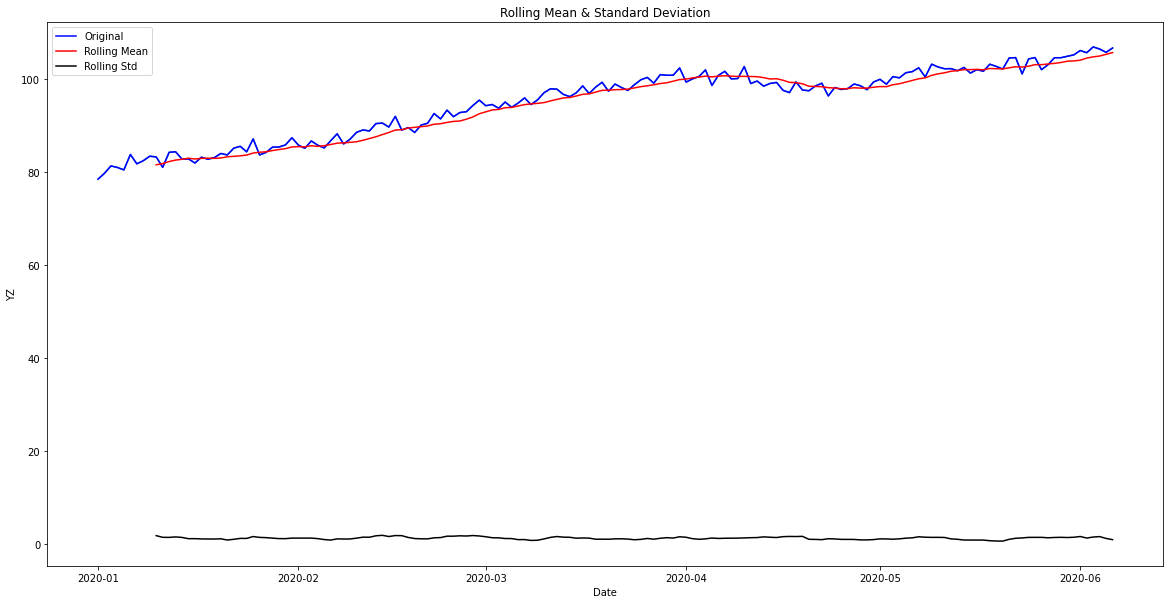

Results of Dickey-Fuller test:
Test Statistic                  -1.353302
p-value                          0.604448
#Lags Used                       2.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from datetime import datetime
# from keras.models import Sequential
# from keras.layers import LSTM,Dropout,Dense
# from sklearn.preprocessing import MinMaxScaler

#Loading training data
dataset = pd.read_csv('YZ_data_train_3.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])
plt.xlabel('Date')
plt.ylabel('YZ')
plt.plot(indexedDataset)
indexedDataset.head(5)
dataset.tail()

#Determining rolling statistics
rolmean = indexedDataset.rolling(window=10).mean()
#rolling standard deviation
rolstd = indexedDataset.rolling(window=10).std()
print(rolmean,rolstd)

orig = plt.plot(indexedDataset, color ='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Pertorm Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test:')
dftest = adfuller(indexedDataset['YZ'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

                  YZ
Date                
2020-01-01  4.363481
2020-01-02  4.379524
2020-01-03  4.399130
2020-01-04  4.394943
2020-01-05  4.388506
...              ...
2020-06-02  4.661267
2020-06-03  4.673016
2020-06-04  4.668708
2020-06-05  4.662023
2020-06-06  4.670864

[158 rows x 1 columns]


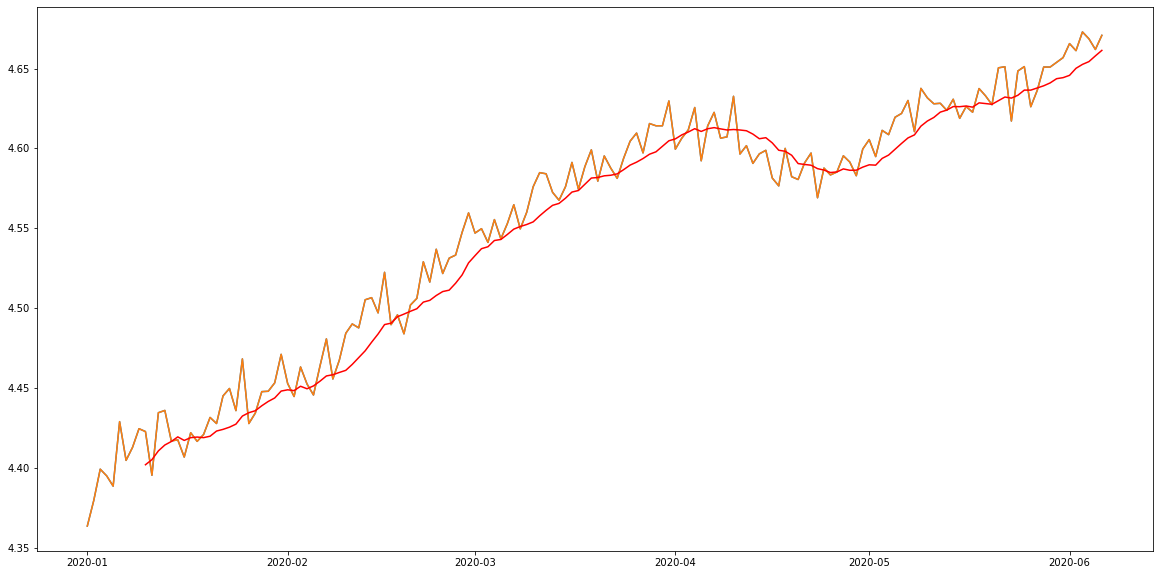

In [41]:
#Estimating trend (value of y axis of the chart changed)
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

movingAverage = indexedDataset_logScale.rolling(window=10).mean()
movingSTD = indexedDataset_logScale.rolling(window=10).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#Perform transformations to receive stationary data
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

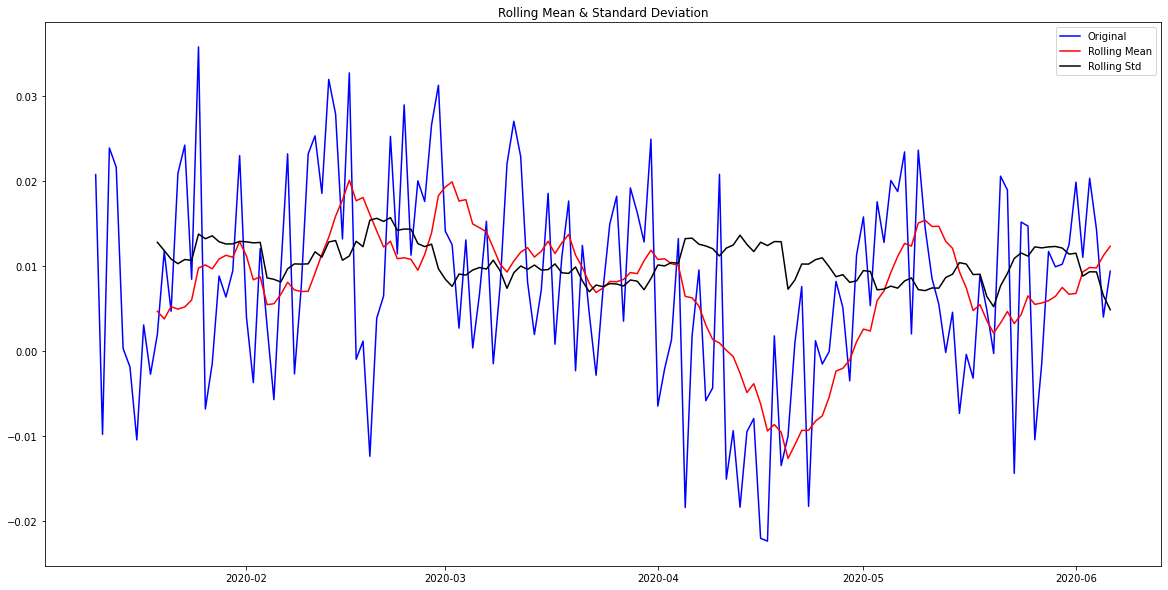

Results of Dickey-Fuller test:
Test Statistic                  -4.128874
p-value                          0.000867
#Lags Used                       4.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64
                  YZ
Date                
2020-01-10  0.020778
2020-01-11 -0.009781
2020-01-12  0.023909
2020-01-13  0.021651
2020-01-14  0.000334
...              ...
2020-06-02  0.011049
2020-06-03  0.020348
2020-06-04  0.014299
2020-06-05  0.004026
2020-06-06  0.009419

[149 rows x 1 columns]


In [47]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=10).mean()
    movingSTD = timeseries.rolling(window=10).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Pertorm Dickey-Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['YZ'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

test_stationarity(datasetLogScaleMinusMovingAverage)

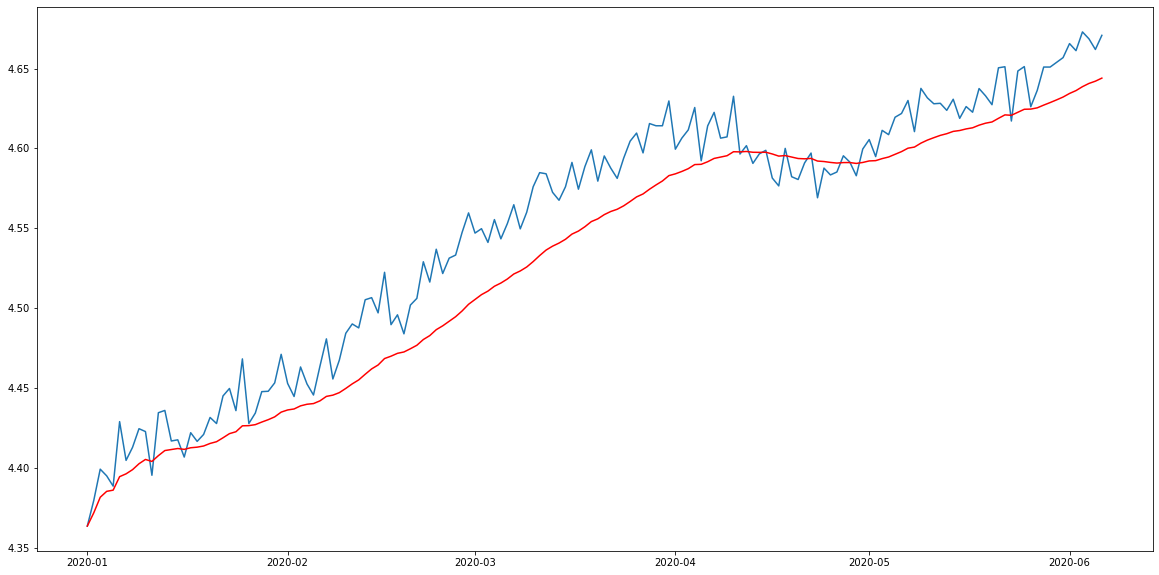

In [19]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=10, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

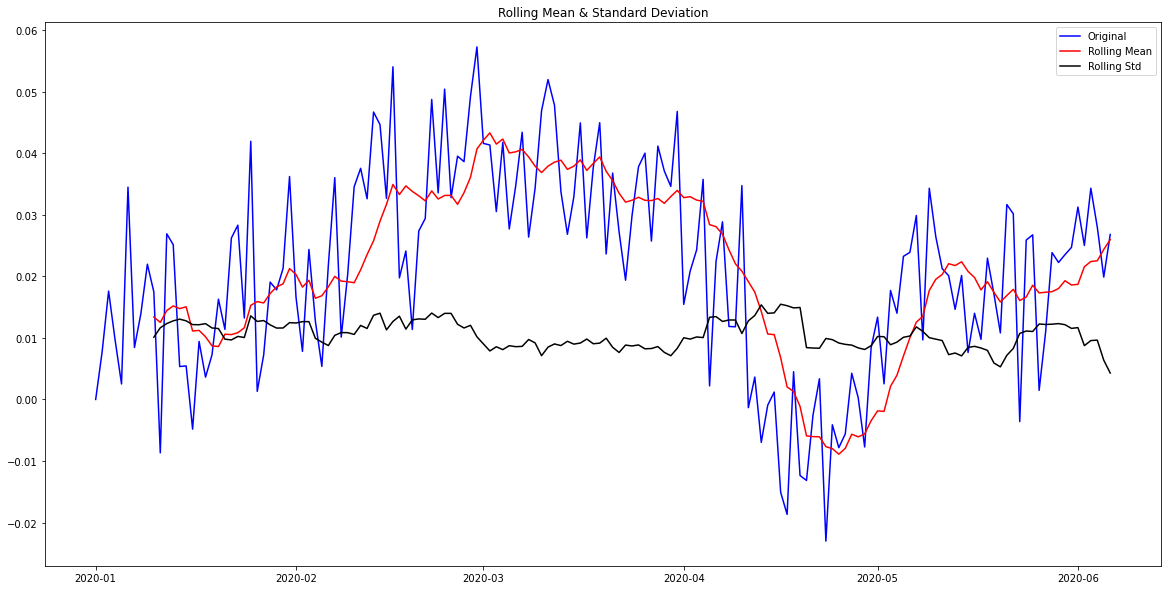

Results of Dickey-Fuller test:
Test Statistic                  -2.377916
p-value                          0.148067
#Lags Used                       2.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


In [13]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

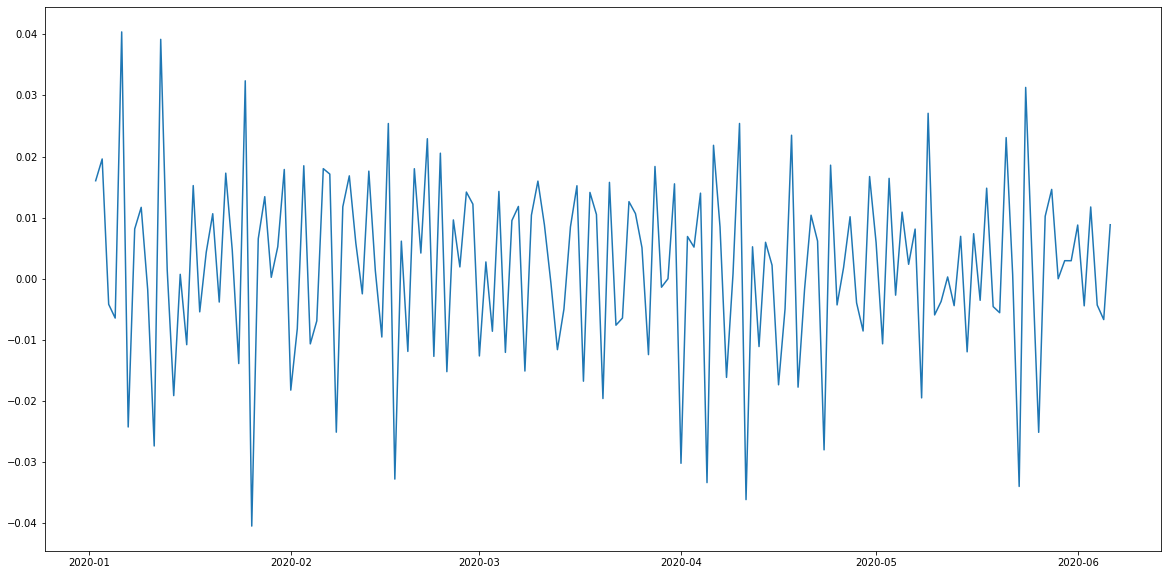

In [14]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

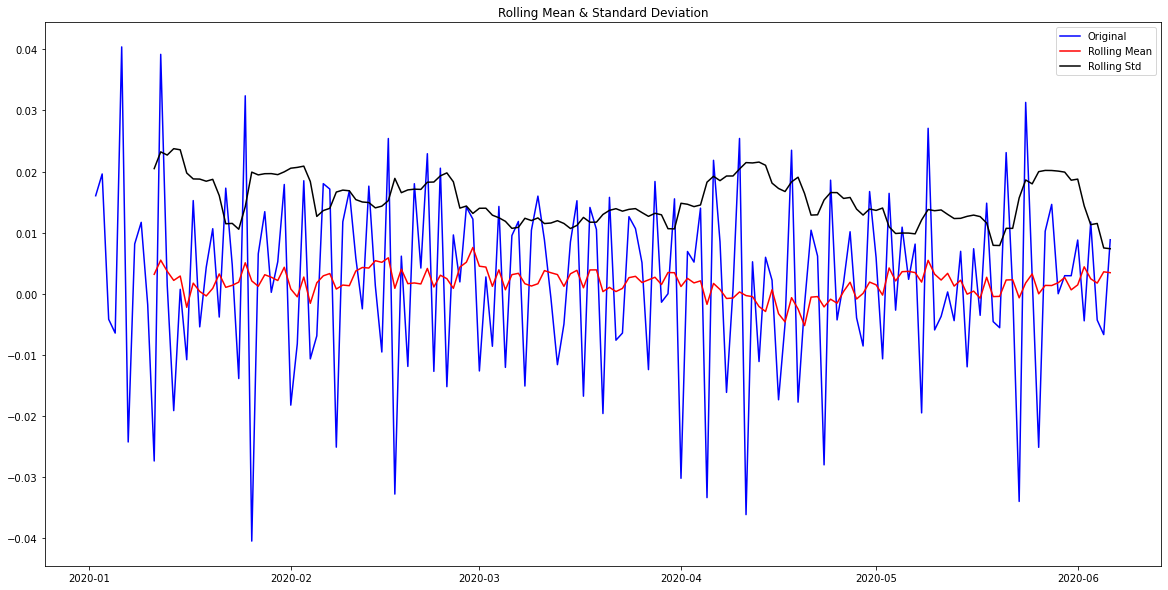

Results of Dickey-Fuller test:
Test Statistic                -1.675144e+01
p-value                        1.332911e-29
#Lags Used                     1.000000e+00
Number of Observations Used    1.550000e+02
Critical Value ()             -2.576812e+00
dtype: float64


In [37]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [57]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity_2(timeseries):
    movingAverage = timeseries.rolling(window=10).mean()
    movingSTD = timeseries.rolling(window=10).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Pertorm Dickey-Fuller test
    timeseries = dataset.set_index(['Date'],['YZ'])
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['YZ'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
    print(timeseries)


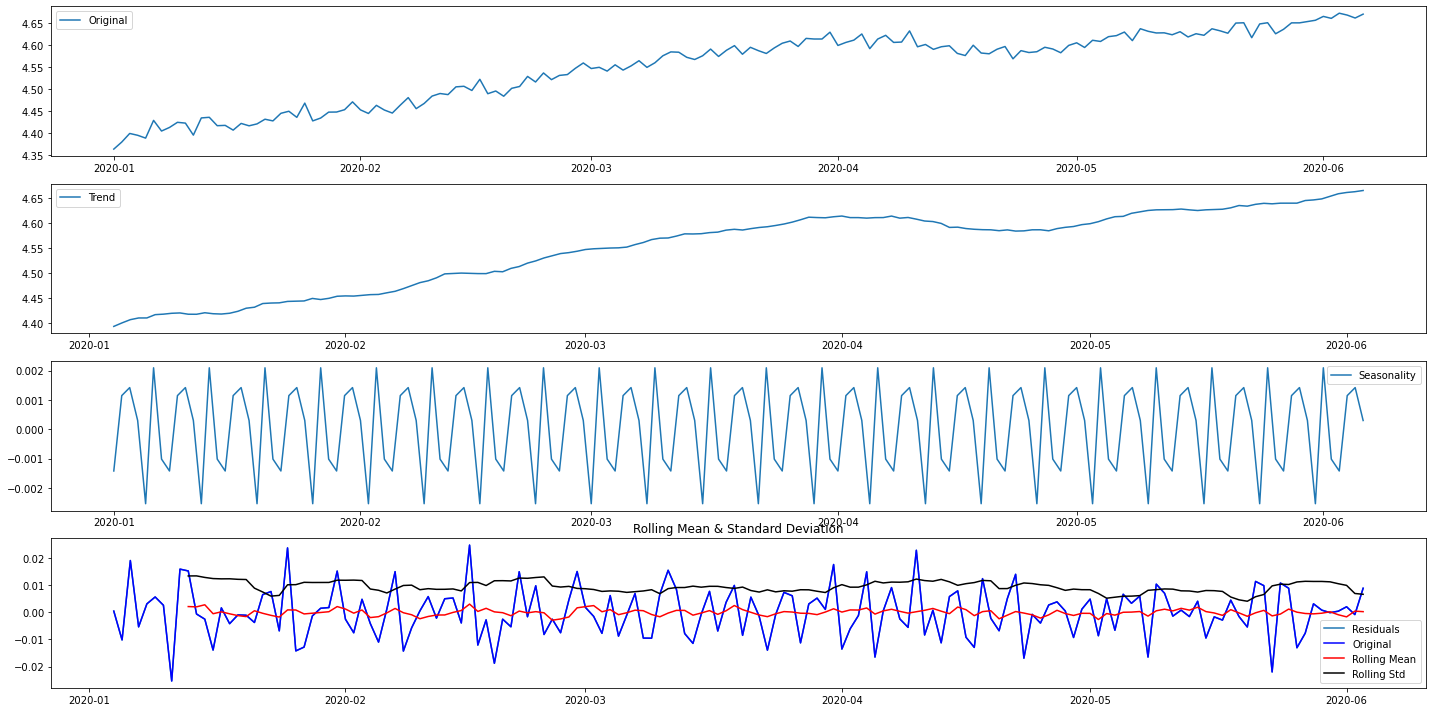

Results of Dickey-Fuller test:
Test Statistic                  -1.353302
p-value                          0.604448
#Lags Used                       2.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64
                YZ
Date              
2020-01-01   78.53
2020-01-02   79.80
2020-01-03   81.38
2020-01-04   81.04
2020-01-05   80.52
...            ...
2020-06-02  105.77
2020-06-03  107.02
2020-06-04  106.56
2020-06-05  105.85
2020-06-06  106.79

[158 rows x 1 columns]


C:\Users\anmlo\anaconda3\envs\downgrade\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only


In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity_2(decomposedLogData)

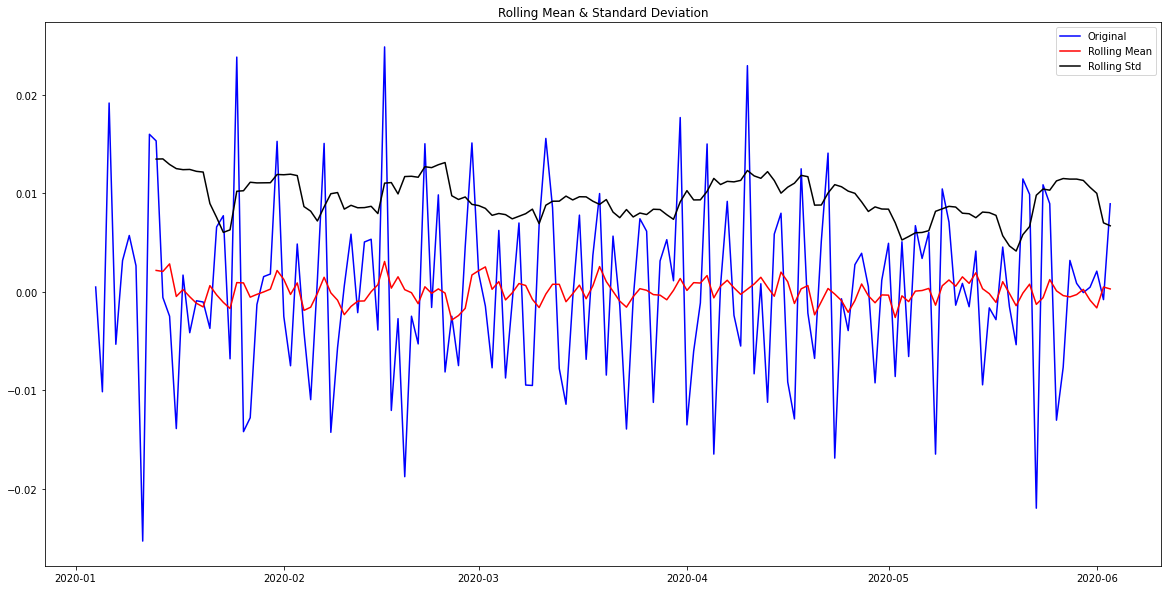

Results of Dickey-Fuller test:
Test Statistic                  -1.353302
p-value                          0.604448
#Lags Used                       2.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64
                YZ
Date              
2020-01-01   78.53
2020-01-02   79.80
2020-01-03   81.38
2020-01-04   81.04
2020-01-05   80.52
...            ...
2020-06-02  105.77
2020-06-03  107.02
2020-06-04  106.56
2020-06-05  105.85
2020-06-06  106.79

[158 rows x 1 columns]


C:\Users\anmlo\anaconda3\envs\downgrade\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only


In [63]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity_2(decomposedLogData)

C:\Users\anmlo\anaconda3\envs\downgrade\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


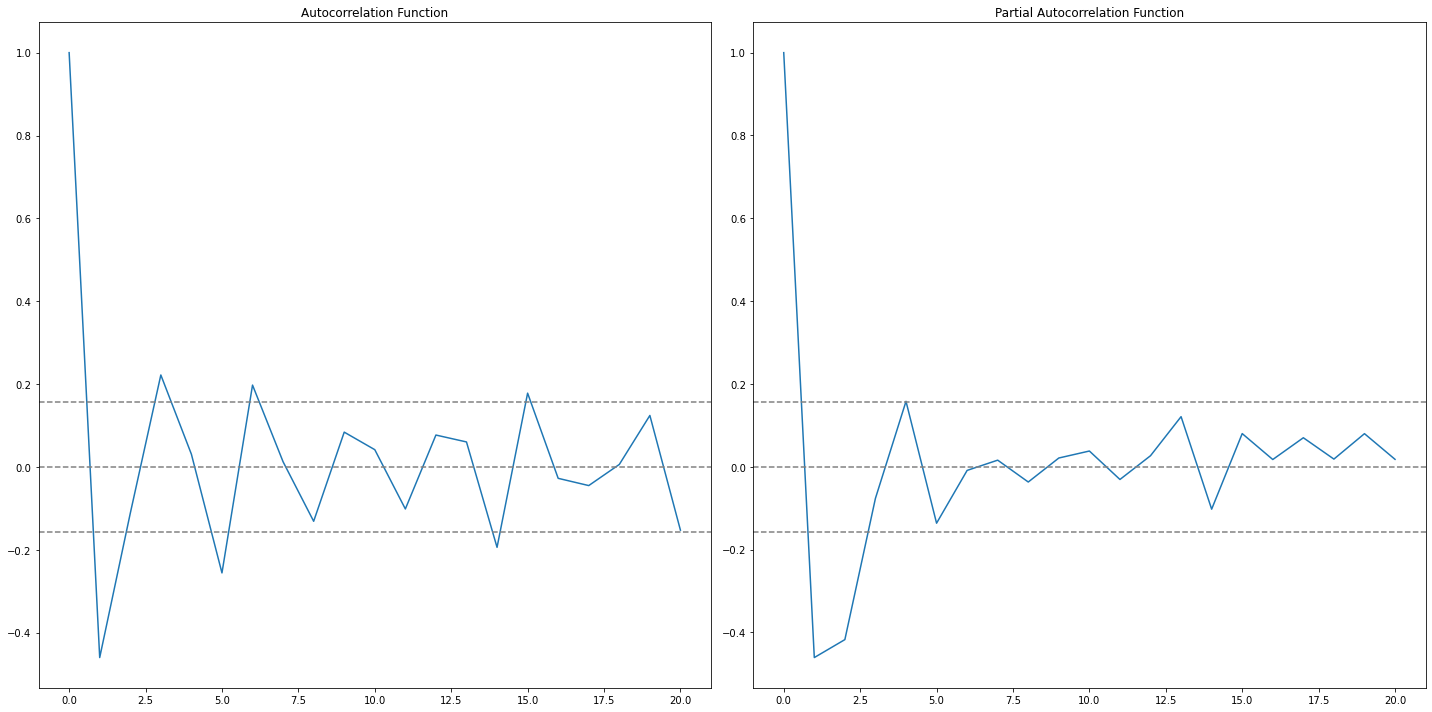

In [25]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\anmlo\anaconda3\envs\downgrade\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anmlo\anaconda3\envs\downgrade\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

Plotting AR model


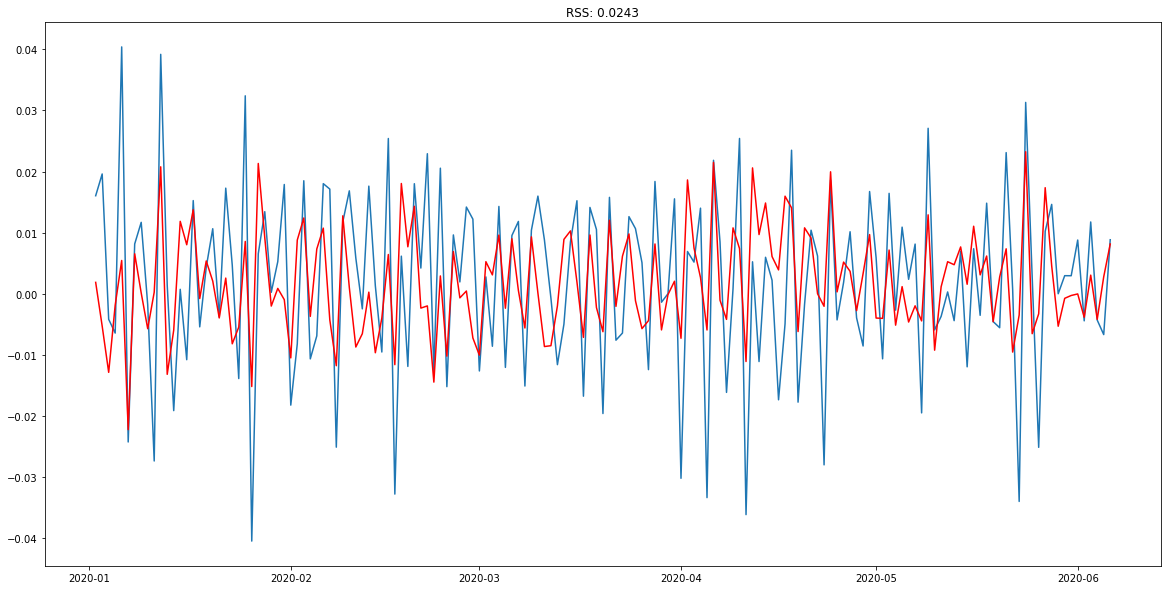

In [67]:
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['YZ'])**2))
print('Plotting AR model')

In [68]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-01-02    0.001863
2020-01-03   -0.005298
2020-01-04   -0.012866
2020-01-05   -0.001874
2020-01-06    0.005447
dtype: float64


In [69]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2020-01-02    0.001863
2020-01-03   -0.003434
2020-01-04   -0.016300
2020-01-05   -0.018174
2020-01-06   -0.012727
dtype: float64


In [85]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['YZ'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2020-01-01    4.363481
2020-01-02    4.381387
2020-01-03    4.395695
2020-01-04    4.378643
2020-01-05    4.370331
dtype: float64

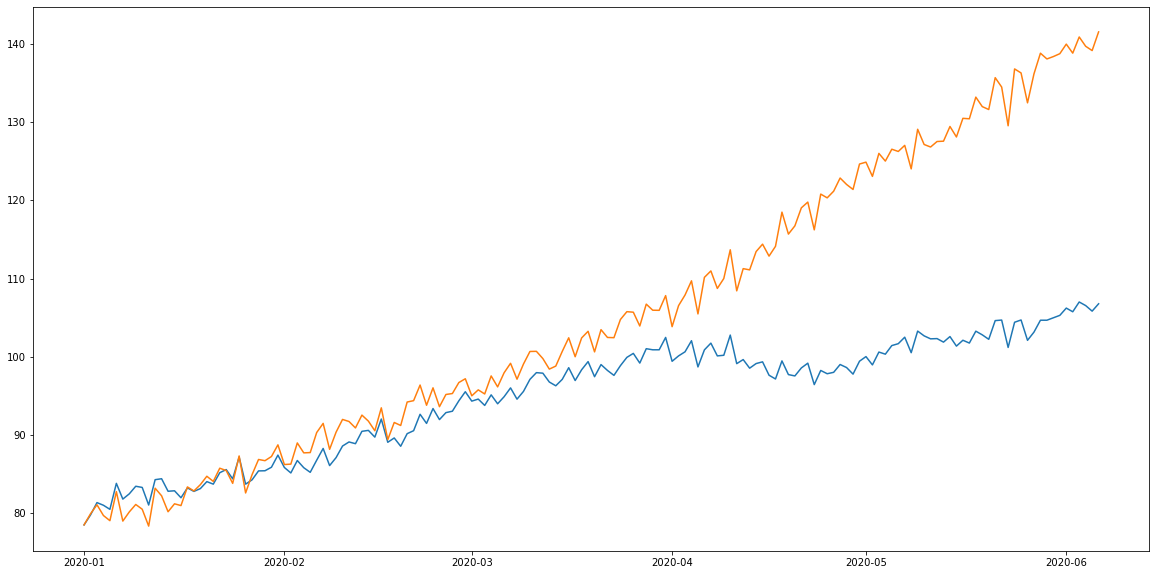

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [91]:
indexedDataset_logScale

,YZ
Date,
2020-01-01,78.53
2020-01-02,79.80
2020-01-03,81.38
2020-01-04,81.04
2020-01-05,80.52
...,...
2020-06-02,105.77
2020-06-03,107.02
2020-06-04,106.56


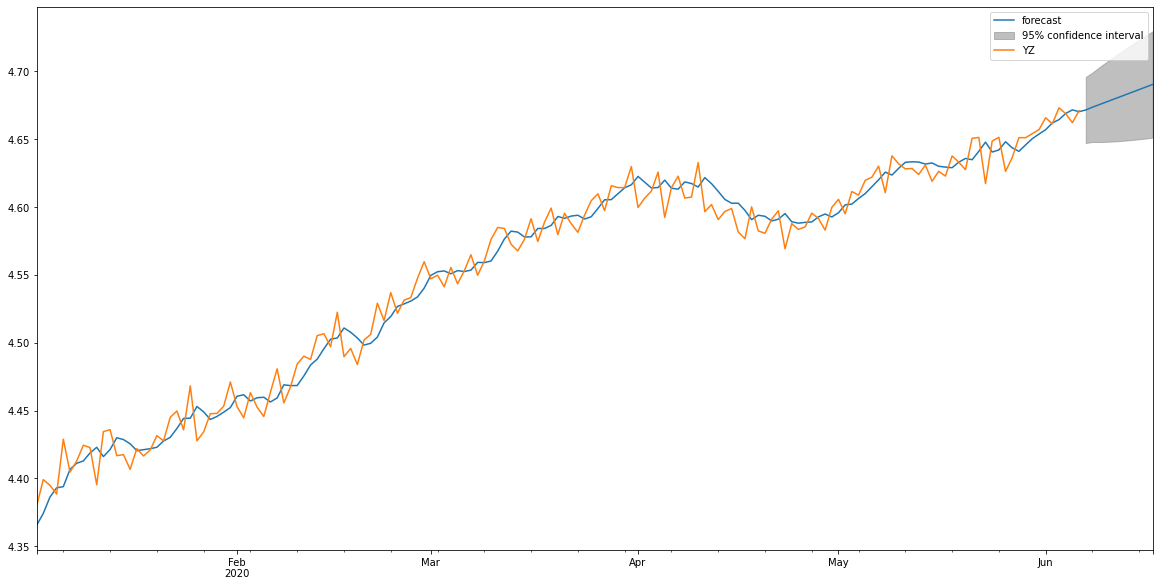

In [79]:
results_ARIMA.plot_predict(1,168)
x=results_ARIMA.forecast(steps=10)

In [95]:
results_ARIMA.forecast(steps=10)

(array([4.67139086, 4.67343775, 4.6752759 , 4.67714271, 4.67900559,
        4.680869  , 4.68273234, 4.68459569, 4.68645904, 4.68832239]),
 array([0.01241868, 0.01305196, 0.01403855, 0.01490623, 0.01573305,
        0.01651763, 0.01726671, 0.0179846 , 0.01867492, 0.01934061]),
 array([[4.64705069, 4.69573103],
        [4.64785639, 4.69901912],
        [4.64776084, 4.70279096],
        [4.64792704, 4.70635838],
        [4.64816938, 4.7098418 ],
        [4.64849505, 4.71324295],
        [4.64889022, 4.71657447],
        [4.64934652, 4.71984486],
        [4.64985687, 4.72306121],
        [4.65041548, 4.7262293 ]]))

In [98]:
ten_predicted_days_log = [4.67139086, 4.67343775, 4.6752759 , 4.67714271, 4.67900559,
        4.680869  , 4.68273234, 4.68459569, 4.68645904, 4.68832239]
ten_predicted_days = np.exp(ten_predicted_days_log)
ten_predicted_days

array([106.84624731, 107.0651738 , 107.26215664, 107.46258173,
       107.6629582 , 107.86376547, 108.06493971, 108.26649023,
       108.46841667, 108.67071972])